In [307]:
import spynnaker.pyNN as p
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from brian2.units import *

In [308]:
p.setup(timestep=1.0, min_delay=1.0, max_delay=144.0)
n_neurons = 1 

In [309]:
run_time = 1000 * ms
f_p1 = 15 * Hz
f_p2 = 10 * Hz

In [310]:
cell_params_lif = {'cm': 0.25,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 4.0,
                   'tau_syn_E': 5.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }

In [311]:
weight_to_spike = 2.
delay = 1

In [312]:
p1 = p.Population(n_neurons, p.IF_curr_exp, cell_params_lif,
                   label='pop_1')
p2 = p.Population(n_neurons, p.IF_curr_exp, cell_params_lif,
                   label='pop_2')

In [313]:
p.Projection(p1, p2, p.OneToOneConnector(weight_to_spike), label='excite 1->2')
p.Projection(p2, p1, p.OneToOneConnector(weight_to_spike), label='excite 2->1')

projection excite 2->1

In [314]:
p1.record_v()
p1.record_gsyn()
p1.record()
p2.record_v()
p2.record_gsyn()
p2.record()

In [315]:
pout = p.Population(n_neurons, p.IF_curr_exp, cell_params_lif,
                   label='pop_out')
spikeArray = {'spike_times': [0, 2*run_time/ms//4]}

# Input populations
input_p1 = p.Population(1, p.SpikeSourceArray, spikeArray,label='inputSpikes_p1')

# Input connections
p.Projection(input_p1, p1, p.OneToOneConnector(weight_to_spike), label='excite input_p1->1')

# Input populations
input_p2 = p.Population(1, p.SpikeSourceArray, {'spike_times': [run_time/ms//4, 3*run_time/ms//4]},label='inputSpikes_p2')

# Input connections
p.Projection(input_p2, p1, p.OneToOneConnector(weight_to_spike),target='inhibitory',  label='inhib input_p1->1')
p.Projection(input_p2, p2, p.OneToOneConnector(weight_to_spike),target='inhibitory',  label='inhib input_p1->1')

projection inhib input_p1->1

In [316]:
pout.record_v()
pout.record_gsyn()
pout.record()

In [317]:
p.Projection(p1, pout, p.OneToOneConnector(weight_to_spike/.2), label='excite 1->out')
# p.Projection(p2, pout, p.OneToOneConnector(weight_to_spike/.5), label='excite 2->out')

projection excite 1->out

In [318]:
p.run(run_time/ms)

Allocating virtual identifiers
|0                           50%                         100%|
Partitioning graph vertices
|0                           50%                         100%|
Partitioning graph edges
|0                           50%                         100%|
Generating partitioner report
|0                           50%                         100%|
Filtering edges
|0                           50%                         100%|
Placing graph vertices
|0                           50%                         100%|
Generating placement report
|0                           50%                         100%|
Generating placement by core report
|0                           50%                         100%|
Generating SDRAM usage report
|0                           50%                         100%|
Routing
|0                           50%                         100%|
Allocating tags
|0                           50%                         100%|
Reporting Tags
|0                   

In [319]:
v_p1 = pout.get_v(compatible_output=True)
gsyn_p1 = pout.get_gsyn(compatible_output=True)
spikes_p1 = pout.getSpikes(compatible_output=True)
v_p2 = p2.get_v(compatible_output=True)
gsyn_p2 = p2.get_gsyn(compatible_output=True)
spikes_p2 = p2.getSpikes(compatible_output=True)
p.end()

Getting membrane voltage for pop_out
|0                           50%                         100%|
Getting conductance for pop_out
|0                           50%                         100%|
Getting spikes for pop_out
|0                           50%                         100%|
Getting membrane voltage for pop_2
|0                           50%                         100%|
Getting conductance for pop_2
|0                           50%                         100%|
Getting spikes for pop_2
|0                           50%                         100%|
Getting provenance data from machine graph
|0                           50%                         100%|
Getting provenance data
|0                           50%                         100%|
Getting Router Provenance
|0                           50%                         100%|
Extracting IOBUF
|0                           50%                         100%|


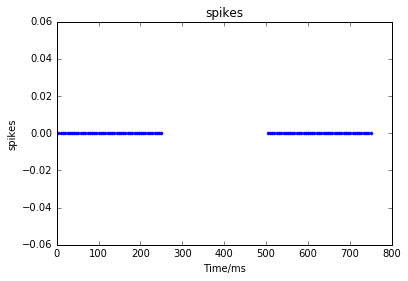

In [320]:
if spikes_p1 is not None:
#     print spikes_p1
    plt.figure()
    plt.plot([i[1] for i in spikes_p1], [i[0] for i in spikes_p1], ".")
    plt.xlabel('Time/ms')
    plt.ylabel('spikes')
    plt.title('spikes')

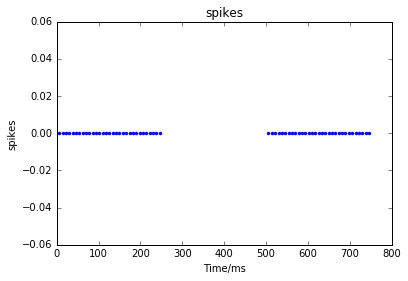

In [321]:
if spikes_p2 is not None:
#     print spikes_p1
    plt.figure()
    plt.plot([i[1] for i in spikes_p2], [i[0] for i in spikes_p2], ".")
    plt.xlabel('Time/ms')
    plt.ylabel('spikes')
    plt.title('spikes')

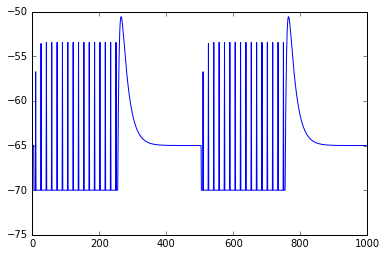

In [322]:
plt.plot(v_p1[:, 2])

In [323]:
spikes_p1[:, 1].size / (run_time)

94. * hertz

In [324]:
np.linspace(100, 1000, 10)

array([  100.,   200.,   300.,   400.,   500.,   600.,   700.,   800.,
         900.,  1000.])